In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential

In [2]:
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [3]:
# resize all the images to this
IMAGE_SIZE=[224,224]

train_path='Malaria_Train'
valid_path = 'Malaria_Test'

In [4]:
#Import the vgg 19 Library as shown below and add preprocessing Layer to the front of VGG 
# Here we will be uing Imagnet Weights

vgg19  = VGG19(input_shape=IMAGE_SIZE+[3], weights='imagenet',include_top=False)

In [5]:
vgg19.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [6]:
# don't train existing weights
for layer in vgg19.layers:
    layer.trainable = False

In [7]:
# useful for getting number of output classes
folders = glob('Malaria_Train/*')

In [8]:
folders

['Malaria_Train\\Parasite', 'Malaria_Train\\Uninfected']

In [9]:
# our layers - you can add more if you want
x = Flatten()(vgg19.output)

In [10]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg19.input, outputs=prediction)

In [11]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [12]:
# tell the model what cost and optimization method to use
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [13]:
# use the image data generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [14]:
# Make sure you provide the same target size as initialised for the image size
training_set = train_datagen.flow_from_directory('Malaria_Train',
                                                target_size=(224,224),
                                                batch_size=32,
                                                class_mode='categorical')

Found 416 images belonging to 2 classes.


In [15]:
test_set = train_datagen.flow_from_directory('Malaria_Test',
                                            target_size=(224,224),
                                            batch_size=32,
                                            class_mode='categorical')

Found 134 images belonging to 2 classes.


In [16]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
            training_set,
            validation_data=test_set,
            epochs=10,
            steps_per_epoch=len(training_set),
            validation_steps=len(test_set)
)

Epoch 1/10
13/13 [==============================] - 77s 6s/step - loss: 1.7415 - accuracy: 0.5048 - val_loss: 1.0392 - val_accuracy: 0.4328
Epoch 2/10
13/13 [==============================] - 84s 7s/step - loss: 0.6697 - accuracy: 0.6755 - val_loss: 0.5045 - val_accuracy: 0.7239
Epoch 3/10
13/13 [==============================] - 85s 7s/step - loss: 0.4603 - accuracy: 0.7548 - val_loss: 0.4913 - val_accuracy: 0.7388
Epoch 4/10
13/13 [==============================] - 82s 6s/step - loss: 0.3879 - accuracy: 0.8221 - val_loss: 0.4401 - val_accuracy: 0.7687
Epoch 5/10
13/13 [==============================] - 80s 6s/step - loss: 0.3238 - accuracy: 0.8774 - val_loss: 0.4763 - val_accuracy: 0.7836
Epoch 6/10
13/13 [==============================] - 81s 6s/step - loss: 0.2999 - accuracy: 0.8918 - val_loss: 0.3671 - val_accuracy: 0.8134
Epoch 7/10
13/13 [==============================] - 82s 6s/step - loss: 0.2806 - accuracy: 0.8894 - val_loss: 0.4706 - val_accuracy: 0.7388
Epoch 8/10
13/13 [==

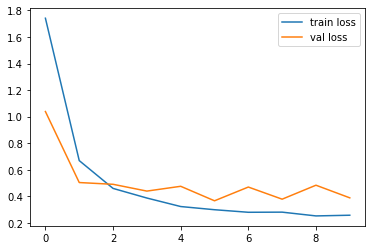

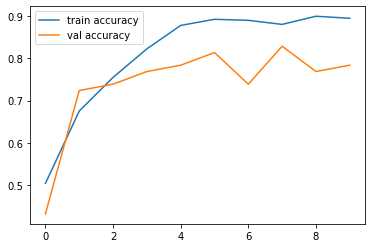

In [17]:
#plot the loss
plt.plot(r.history['loss'],label='train loss')
plt.plot(r.history['val_loss'],label='val loss')
plt.legend()
plt.show()
# plt.savefig('LossVal_loss')

#plot the accuracy
plt.plot(r.history['accuracy'],label='train accuracy')
plt.plot(r.history['val_accuracy'],label='val accuracy')
plt.legend()
plt.show()

In [18]:
y_pred = model.predict(test_set)

5/5 [==============================] - 23s 4s/step


In [19]:
y_pred

array([[9.92821753e-01, 7.17826886e-03],
       [9.28924918e-01, 7.10750893e-02],
       [3.23172003e-01, 6.76828027e-01],
       [9.96033013e-01, 3.96695687e-03],
       [9.85257804e-01, 1.47421965e-02],
       [3.31943184e-01, 6.68056846e-01],
       [7.86891043e-01, 2.13108987e-01],
       [6.72761321e-01, 3.27238649e-01],
       [9.99133766e-01, 8.66218237e-04],
       [9.99337733e-01, 6.62286417e-04],
       [7.05819190e-01, 2.94180840e-01],
       [3.26173991e-01, 6.73825979e-01],
       [9.55553353e-01, 4.44466583e-02],
       [5.86154997e-01, 4.13844973e-01],
       [9.99198139e-01, 8.01920891e-04],
       [5.45794785e-01, 4.54205185e-01],
       [4.30550367e-01, 5.69449604e-01],
       [6.50116205e-01, 3.49883795e-01],
       [9.99535084e-01, 4.64946410e-04],
       [9.84282553e-01, 1.57175139e-02],
       [9.89622474e-01, 1.03774955e-02],
       [9.91145313e-01, 8.85471702e-03],
       [5.77447772e-01, 4.22552228e-01],
       [9.95714724e-01, 4.28523635e-03],
       [4.770968

In [20]:
y_pred = np.argmax(y_pred,axis=1)

In [21]:
y_pred

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0], dtype=int64)

In [41]:
# save it as a h5 file
from tensorflow.keras.models import load_model
model.save("h5 files/Malaria_modelvgg19.h5")

In [42]:
# loading an image to check our model

In [43]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [44]:
model=load_model('h5 files/Malaria_modelvgg19.h5')

In [65]:
img=image.load_img('Malaria_Test/Parasite/C39P4thinF_original_IMG_20150622_105554_cell_10.png',target_size=(224,224))

In [66]:
x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [67]:
x.shape

(224, 224, 3)

In [68]:
x=x/255

x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [69]:
model.predict(img_data)

1/1 [==============================] - 0s 150ms/step


array([[0.06421894, 0.93578106]], dtype=float32)

In [70]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 143ms/step


In [72]:
if(a==1):
    print("Uninfected")
else:
    print("Infected")

Uninfected
